<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up</B> for Health - Machine Learning</div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote</B> | Jan du Plessis Notebook - <B>Machine Learning</b></span><div style='margin:4px 26px; color:#273333; font-size:17px;'>
</div>

## 📙 Importing Libraries

In [24]:
import pandas as pd 

from showupforhealth.params import *
from showupforhealth.utils import *
from showupforhealth.interface import *
from showupforhealth.ml_functions.preprocessor import *

# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
data = pd.read_csv(f'{OUTPUT_DATA}full_train_data.csv')
data.head()

,Appointment_status,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White
0,1,17.7,0.0,40,0,0.00,0,0,0,0,0,0,0,22698.0,0.519419,0.816996,54.0,1,17.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1,19.4,0.0,66,2,0.03,1,0,0,0,1,0,0,8243.0,0.332691,0.600495,37.0,0,70.0,-0.120537,-0.992709,0.258819,-0.965926,-0.5,-0.866025,0.433884,-0.900969,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,18.3,0.0,58,0,0.11,0,1,0,0,0,0,0,7626.0,0.155802,0.215224,27.0,0,28.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.433884,-0.900969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Define X & y

In [26]:
X, y = define_X_y(data, 'Appointment_status')

X - independant variable shape: (901516, 36)
y - dependant variable - Appointment_status: (901516,)


## ✂️ Train Test Split

In [27]:
X_train, X_test, y_train, y_test = perform_train_test_split(X, y)

✅ OUTPUT: X_train, X_test, y_train, y_test
Train Set:  X_train, y_train - (721212, 36), (721212,)
 Test Set:  X_test, y_test - - (180304, 36), (180304,)


## ⚖️ Class imbalance


In [28]:
print("DNA distribution in train val and test set pre-oversampling")
print("-"*75)
print(f"There are {pd.Series(y_train).value_counts()[0]} DNAs in the train set")
print(f"There are {pd.Series(y_test).value_counts()[0]} DNAs in the test set")

DNA distribution in train val and test set pre-oversampling
---------------------------------------------------------------------------
There are 27407 DNAs in the train set
There are 6977 DNAs in the test set


## 🔁 Oversampling SMOTE

In [29]:
X_train_os, y_train_os = oversample_with_smote(X_train, y_train, sampling_strategy=0.1)

✅ Data Oversampled: SMOTE - X_train_os:(763185, 36) y_train_os :(763185,)


In [30]:
print("DNAs in X_train_os post-oversampling")
print("-"*75)
print(f"There are {pd.Series(y_train_os).value_counts()[0]} DNAs in the train set")

DNAs in X_train_os post-oversampling
---------------------------------------------------------------------------
There are 69380 DNAs in the train set


KeyError: 0

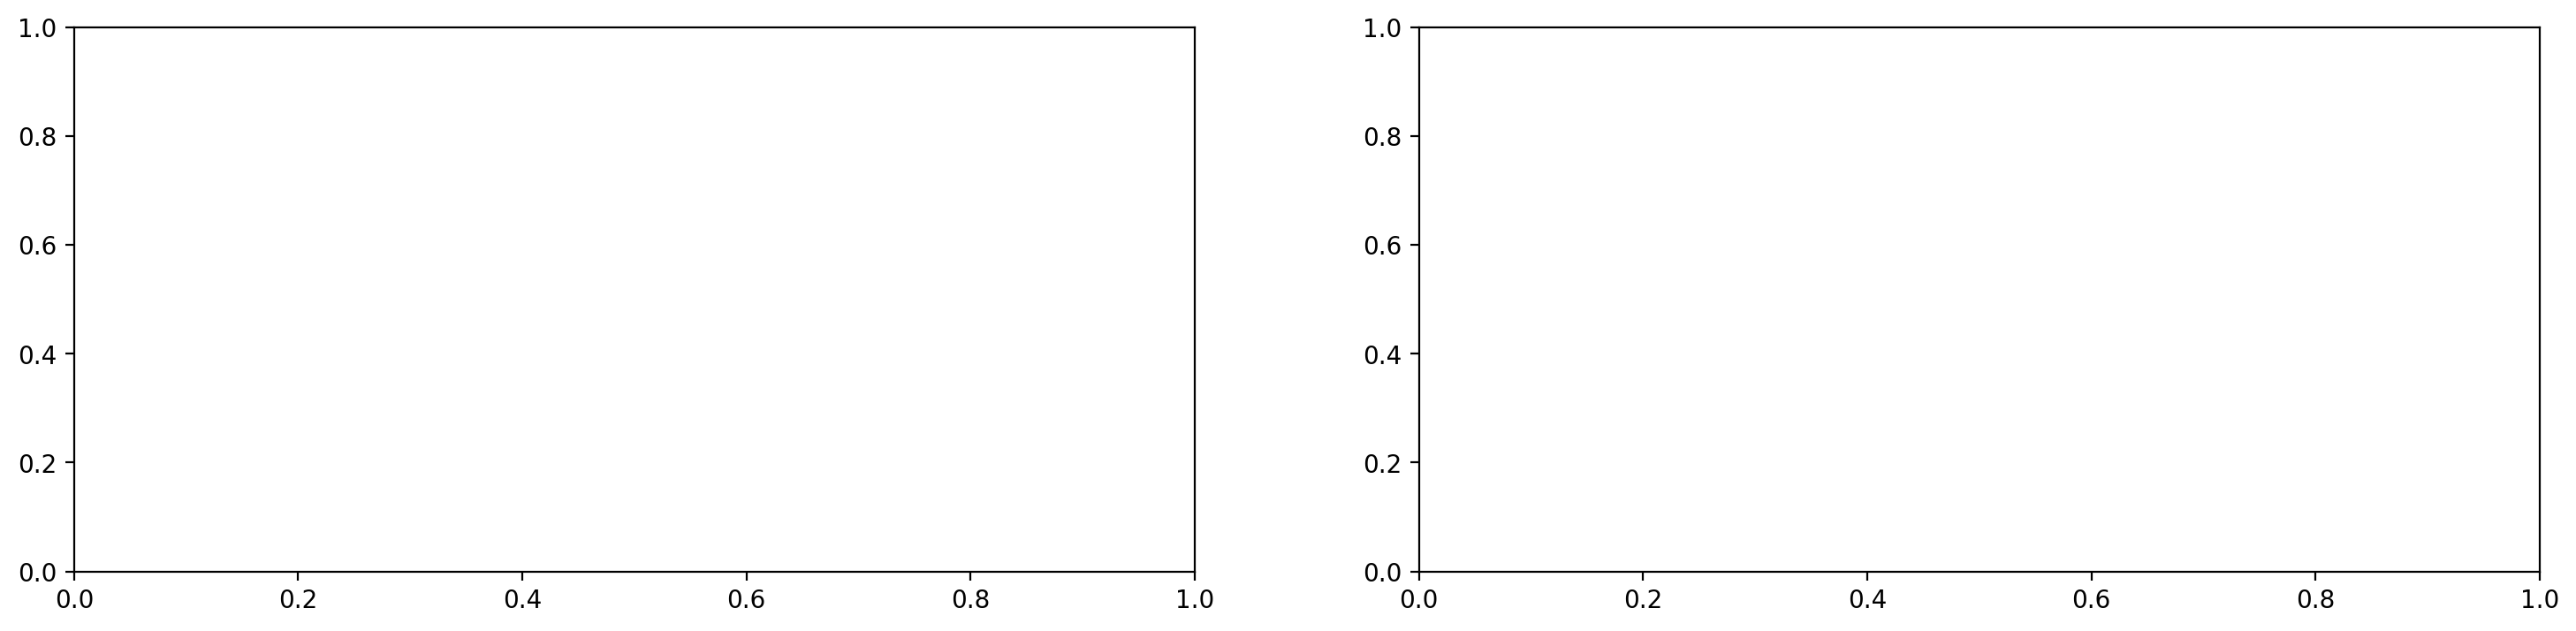

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

''' Before rebalancing classes'''

sns.countplot(y_train, ax=ax[0], color='#2c738f')
ax[0].set_title('Y_train before balancing', fontsize=14)

''' After rebalancing classes'''

sns.countplot(y_train_os, ax=ax[1], color='#06aed5')
ax[1].set_title('Y_train_os after balancing', fontsize=14);

In [35]:
X_train_os_s = scale_df(X_train_os, 'minmax')

✅ Data Scaled: MinMaxScaler() - (763185, 36)


In [36]:
X_train_os_s

,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White
0,0.373206,0.051020,0.915094,0.000000,0.626667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.668337,0.270738,0.035194,0.000000,0.0,0.136054,0.057272,0.732362,0.933013,0.267949,0.066987,0.750000,0.500000,1.000000e+00,0.031746,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.00000,1.00000
1,0.334928,0.000000,0.471698,0.000000,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.668337,0.285781,0.003071,0.000000,0.0,0.170068,0.967508,0.677302,0.750000,0.071797,1.000000,0.500000,0.722521,5.551115e-17,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,1.00000
2,0.461722,0.030612,0.254717,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727707,0.149021,0.060805,0.000000,0.0,0.027211,0.967508,0.322698,0.146447,0.156961,0.933013,0.250000,0.900969,8.019377e-01,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.00000,0.00000
3,0.265550,0.000000,0.349057,0.000000,0.080000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050945,0.054737,0.340169,0.000000,0.0,0.047619,0.732362,0.942728,0.146447,0.156961,0.750000,0.933013,0.722521,5.551115e-17,0.007937,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,1.00000
4,0.459330,0.000000,0.509434,0.000000,0.186667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.745535,0.074833,0.005011,0.032787,0.0,0.136054,0.125745,0.831561,0.250000,0.071797,0.250000,0.933013,0.722521,5.551115e-17,0.063492,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763180,0.401914,0.000000,0.632075,0.666667,0.146667,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.723283,0.107276,0.007675,0.078689,0.0,0.170068,0.032492,0.677302,0.629410,0.018260,0.066987,0.750000,0.277479,0.000000e+00,0.015873,0.0,0.000000,0.000000,1.000000,1.0,0.0,0.0,0.00000,0.00000
763181,0.236983,0.009249,0.094340,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.836657,0.239949,0.027854,0.039344,0.0,0.125432,0.269125,0.911492,0.933013,0.267949,0.296788,0.933013,0.900969,8.019377e-01,0.008679,0.0,0.093577,0.000000,0.906423,0.0,0.0,1.0,0.00000,0.00000
763182,0.586124,0.000000,0.547170,0.000000,0.040000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.836657,0.237016,0.024919,0.059016,0.0,0.081633,0.322698,0.032492,0.250000,0.071797,0.250000,0.066987,0.277479,0.000000e+00,0.015873,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.16731,0.83269
763183,0.485007,0.000000,0.471698,0.000000,0.146667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.066072,0.235064,0.143877,0.018871,0.0,0.299320,0.298206,0.659100,0.397474,0.092606,0.372171,0.721406,0.766123,1.959478e-01,0.063492,0.0,0.000000,0.244343,0.755657,0.0,0.0,1.0,0.00000,0.00000


In [42]:
sample_df()


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GaussianNB(input_matrix)

Best pipeline: GaussianNB(input_matrix)
Pipeline(steps=[('gaussiannb', GaussianNB())])
0.8140162608017715


TypeError: function missing required argument 'year' (pos 1)